In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geologist/dataset_geologist.xlsx


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.cbook import boxplot_stats
from mpl_toolkits.basemap import Basemap
%matplotlib inline

# Data preparation

In [3]:
path = '/kaggle/input/geologist/dataset_geologist.xlsx'
data = pd.read_excel(path, index_col='Unnamed: 0')

In [4]:
new_col_names = ['_'.join(s.split()[1:]) for s in data.columns]
new_col_names[0] = 'num'

In [5]:
data.columns = new_col_names

In [6]:
data.head(15)

,num,Field_name,Reservoir_unit,Country,Region,Basin_name,Tectonic_regime,Latitude,Longitude,Operator_company,...,Hydrocarbon_type_(main),Reservoir_status_(current),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
0,6,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION,26.0800,49.8100,SAUDI ARAMCO,...,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
1,10,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,...,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
2,11,ABU MADI-EL QARA,ABU MADI (LEVEL II),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,31.4382,31.3616,IEOC,...,GAS,DECLINING PRODUCTION,WRENCH,9843,NEOGENE,THINLY-BEDDED SANDSTONE,115.0,66.0,22.0,200.0
3,12,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,31.4382,31.3616,IEOC,...,GAS,DECLINING PRODUCTION,WRENCH,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
4,20,AL HUWAISAH,SHUAIBA,OMAN,MIDDLE EAST,FAHUD SALT,COMPRESSION,21.9607,56.0452,PDO,...,OIL,REJUVENATING,SALT,4955,CRETACEOUS,LIMESTONE,250.0,100.0,21.0,60.0
5,21,ALABAMA FERRY,UPPER GLEN ROSE D ZONE,USA,NORTH AMERICA,GULF OF MEXICO NORTHERN ONSHORE,GRAVITY,31.2143,-95.7981,NUMEROUS,...,OIL,MATURE PRODUCTION,PASSIVE MARGIN,8700,CRETACEOUS,LIMESTONE,95.0,15.0,12.0,20.0
6,22,ALBA,ALBA,UK,EUROPE,NORTH SEA CENTRAL,NaN,58.0692,1.0784,CHEVRON,...,OIL,DECLINING PRODUCTION,RIFT,5642,PALEOGENE,THINLY-BEDDED SANDSTONE,300.0,270.0,NaN,3500.0
7,25,ALBION-SCIPIO,TRENTON-BLACK RIVER,USA,NORTH AMERICA,MICHIGAN,NaN,41.9937,-84.6016,NUMEROUS,...,OIL,NEARLY DEPLETED,INTRACRATONIC,3800,ORDOVICIAN,DOLOMITE,600.0,400.0,NaN,10.0
8,28,ALIBEKMOLA,KT I,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION,48.4740,57.6667,KAZAKHOIL AKTOBE,...,OIL,DEVELOPING,SUB-SALT,6000,CARBONIFEROUS,LIMESTONE,300.0,105.0,10.0,20.0
9,29,ALIBEKMOLA,KT II,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION,48.4740,57.6667,KAZAKHOIL AKTOBE,...,OIL,DEVELOPING,SUB-SALT,9580,CARBONIFEROUS,LIMESTONE,607.0,108.0,10.0,20.0


In [7]:
df = data.copy()
df.drop('num', inplace=True, axis=1)
df.dropna(inplace=True)

In [8]:
df.shape

(442, 20)

### What we want to generate?

In [9]:
need_cols = ['Tectonic_regime', 'Region', 'Hydrocarbon_type_(main)', 'Structural_setting', 'Depth_(top_reservoir_ft_TVD)', 'Reservoir_period', 'Lithology_(main)',
       'Thickness_(gross_average_ft)', 'Thickness_(net_pay_average_ft)', 'Porosity_(matrix_average_%)', 'Permeability_(air_average_mD)']

### Numerical columns

In [10]:
num_cols = data[need_cols].select_dtypes(exclude='object').dropna()
num_cols.shape

(442, 5)

In [11]:
num_cols.describe()

,Depth_(top_reservoir_ft_TVD),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
count,442.000000,442.000000,442.000000,442.000000,442.000000
mean,6613.658371,784.540724,189.061946,17.929955,469.916425
std,3572.468358,1442.899648,282.161279,7.554253,1017.081304
min,220.000000,11.000000,0.000000,1.100000,0.010000
25%,3824.500000,135.750000,43.000000,12.000000,10.000000
50%,6137.500000,328.000000,100.000000,17.900000,79.500000
75%,9071.500000,748.750000,206.500000,24.000000,400.000000
max,19888.000000,12500.000000,2976.000000,55.000000,7500.000000


### EDA before Discretizing

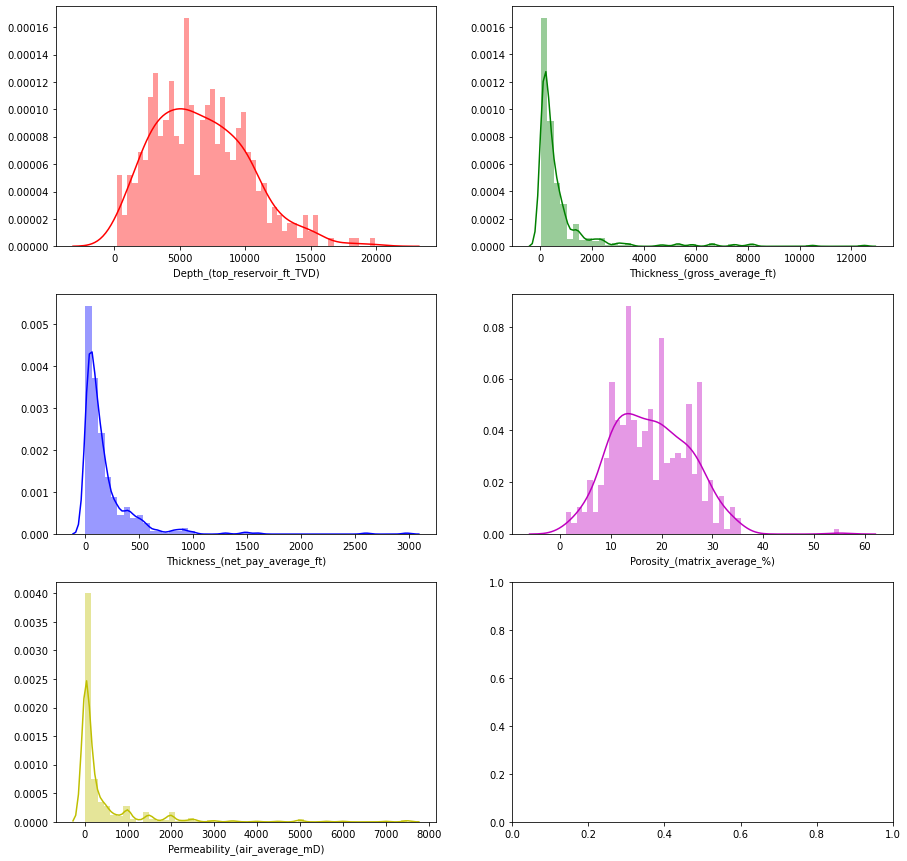

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.distplot(df['Depth_(top_reservoir_ft_TVD)'], bins=50, color='r', ax=axes[0, 0])
sns.distplot(df['Thickness_(gross_average_ft)'], bins=50, color='g', ax=axes[0, 1])
sns.distplot(df['Thickness_(net_pay_average_ft)'], bins=50, color='b', ax=axes[1, 0])
sns.distplot(df['Porosity_(matrix_average_%)'].dropna(), bins=50, color='m', ax=axes[1, 1])
sns.distplot(df['Permeability_(air_average_mD)'], bins=50, color='y', ax=axes[2, 0])

In [13]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [14]:
distortions = [] 
K = range(3, 20)

for k in K:
    model = KMeans(n_clusters=k).fit(num_cols)
    distortions.append(sum(np.min(cdist(num_cols, model.cluster_centers_, 'euclidean'), axis=1)) / num_cols.shape[0])

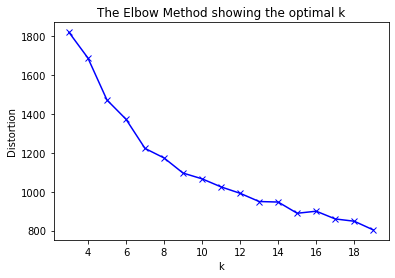

In [15]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

According to distribution plots and clusters we can try to define an optimal n_bins value and stratefy for KBinsDiscretizer.

So optimal n_bins is 9

In [16]:
distortions_per_one = []
K = range(3, 20)

for c in num_cols.columns:
    temp_dist = []
    for k in K:
        column_data = num_cols[c].to_numpy().reshape(-1, 1)
        model = KMeans(n_clusters=k).fit(num_cols[c].to_numpy().reshape(-1, 1))
        temp_dist.append(sum(np.min(cdist(column_data, model.cluster_centers_, 'euclidean'), axis=1)) / num_cols.shape[0])
    distortions_per_one.append(temp_dist)

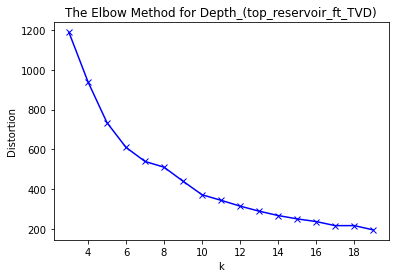

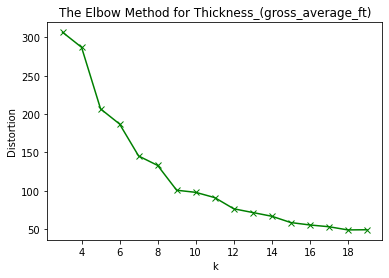

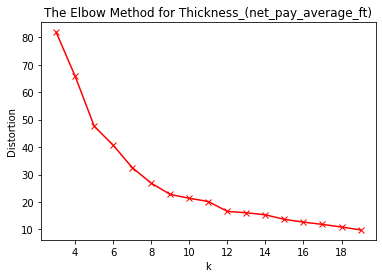

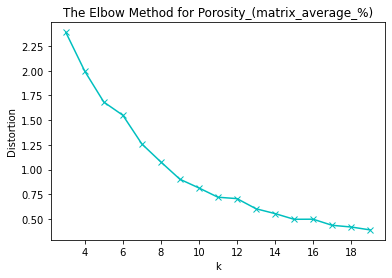

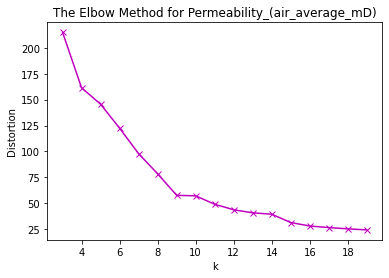

In [17]:
colors = ['b', 'g', 'r', 'c', 'm']
for i, c in enumerate(num_cols):
    plt.plot(K, distortions_per_one[i], f'{colors[i]}x-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title(f'The Elbow Method for {c}')
    plt.show()

In [18]:
bins = {'Depth_(top_reservoir_ft_TVD)': 10, 
        'Thickness_(gross_average_ft)': 9, 
        'Thickness_(net_pay_average_ft)': 9, 
        'Porosity_(matrix_average_%)': 10,
        'Permeability_(air_average_mD)': 9}

### Discretization

In [19]:
from sklearn.preprocessing import KBinsDiscretizer

In [20]:
num_cols_varbins = num_cols.copy()

#### One discretizer for all

In [21]:
num_cols = num_cols_varbins.copy()

In [22]:
kbins = KBinsDiscretizer(n_bins=9, encode='ordinal', strategy='quantile')
num_cols[num_cols.columns] = kbins.fit_transform(num_cols)
num_cols = num_cols.astype('int')
num_cols.head()

,Depth_(top_reservoir_ft_TVD),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
0,4,3,6,6,6
1,7,6,5,1,2
2,7,1,3,6,5
3,7,5,7,5,6
4,3,3,4,6,4


In [23]:
num_cols.columns

Index(['Depth_(top_reservoir_ft_TVD)', 'Thickness_(gross_average_ft)',
       'Thickness_(net_pay_average_ft)', 'Porosity_(matrix_average_%)',
       'Permeability_(air_average_mD)'],
      dtype='object')

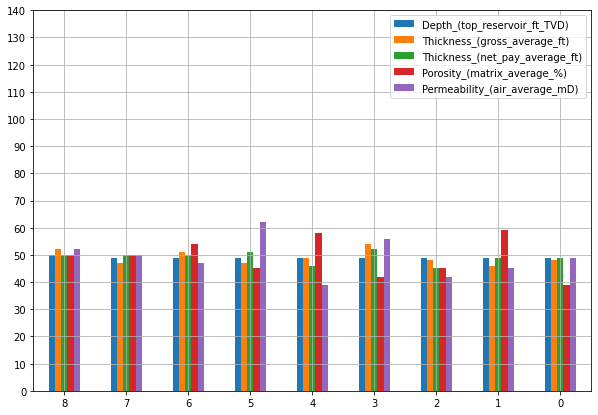

In [24]:
hist_df = pd.DataFrame()
for c in num_cols.columns:
    hist_df[c] = num_cols[c].value_counts()
hist_df.plot.bar(figsize=(10, 7), grid=True, yticks=[i for i in range(0, 150, 10)], rot=0)
plt.show()

#### One discretizer per feature

In [25]:
discretizers = []
for c in num_cols_varbins.columns:
    temp_kbins = KBinsDiscretizer(n_bins=bins[c], encode='ordinal', strategy='quantile')
    num_cols_varbins[c] = temp_kbins.fit_transform(num_cols_varbins[c].to_numpy().reshape(-1, 1))
    num_cols_varbins = num_cols_varbins.astype('int')
    discretizers.append(temp_kbins)
num_cols_varbins.head()

,Depth_(top_reservoir_ft_TVD),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
0,4,3,6,6,6
1,8,6,5,1,2
2,8,1,3,7,5
3,8,5,7,6,6
4,3,3,4,6,4


### Categorical columns

In [26]:
cat_cols = df.select_dtypes(include='object')
cat_cols.head()

,Field_name,Reservoir_unit,Country,Region,Basin_name,Tectonic_regime,Operator_company,Onshore_or_offshore,Hydrocarbon_type_(main),Reservoir_status_(current),Structural_setting,Reservoir_period,Lithology_(main)
0,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,JURASSIC,LIMESTONE
1,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,GUPCO,ONSHORE,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,CRETACEOUS,SANDSTONE
2,ABU MADI-EL QARA,ABU MADI (LEVEL II),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,IEOC,ONSHORE,GAS,DECLINING PRODUCTION,WRENCH,NEOGENE,THINLY-BEDDED SANDSTONE
3,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,IEOC,ONSHORE,GAS,DECLINING PRODUCTION,WRENCH,NEOGENE,SANDSTONE
4,AL HUWAISAH,SHUAIBA,OMAN,MIDDLE EAST,FAHUD SALT,COMPRESSION,PDO,ONSHORE,OIL,REJUVENATING,SALT,CRETACEOUS,LIMESTONE


### Label encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
cat_cols_to_le = ['Tectonic_regime', 'Region', 'Hydrocarbon_type_(main)', 'Structural_setting', 'Reservoir_period', 'Lithology_(main)']

In [29]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [30]:
fitted_le = df[cat_cols_to_le].apply(lambda x: d[x.name].fit_transform(x))

### Combine whole dataset

In [31]:
df_final = df[need_cols]
df_final[num_cols.columns] = num_cols
df_final[cat_cols_to_le] = fitted_le
df_final.head()

,Tectonic_regime,Region,Hydrocarbon_type_(main),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
0,0,5,5,2,4,5,9,3,6,6,6
1,2,0,3,6,7,3,11,6,5,1,2
2,5,0,2,11,7,7,15,1,3,6,5
3,5,0,2,11,7,7,11,5,7,5,6
4,0,5,5,7,3,3,9,3,4,6,4


In [32]:
df_final.shape

(442, 11)

In [33]:
df_final_varbins = df[need_cols]
df_final_varbins[num_cols_varbins.columns] = num_cols_varbins
df_final_varbins.head()

,Tectonic_regime,Region,Hydrocarbon_type_(main),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
0,COMPRESSION,MIDDLE EAST,OIL,FORELAND,4,JURASSIC,LIMESTONE,3,6,6,6
1,EXTENSION,AFRICA,GAS-CONDENSATE,RIFT,8,CRETACEOUS,SANDSTONE,6,5,1,2
2,STRIKE-SLIP,AFRICA,GAS,WRENCH,8,NEOGENE,THINLY-BEDDED SANDSTONE,1,3,7,5
3,STRIKE-SLIP,AFRICA,GAS,WRENCH,8,NEOGENE,SANDSTONE,5,7,6,6
4,COMPRESSION,MIDDLE EAST,OIL,SALT,3,CRETACEOUS,LIMESTONE,3,4,6,4


### Create Bayesian network

In [34]:
!pip install pgmpy

     |████████████████████████████████| 314 kB 605 kB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


Various code examples

https://github.com/pgmpy/pgmpy/blob/dev/examples/Structure%20Learning%20in%20Bayesian%20Networks.ipynb

https://github.com/pgmpy/pgmpy_notebook/tree/master/notebooks

http://pgmpy.org/estimators.html?highlight=bdeu#base-estimator-classes

In [35]:
from pgmpy.estimators import HillClimbSearch, ExhaustiveSearch, MmhcEstimator
from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.sampling import BayesianModelSampling

#### BDeu

To obtain the BDeu score, we need a parameter called equivalent sample size α that expresses the strength of our prior belief in the uniformity of the conditional distributions of the network.  A quick look at the Bayesian network learning literature reveals that there is no generally accepted “uninformative” value for the α parameter.

https://arxiv.org/ftp/arxiv/papers/1206/1206.5293.pdf

In practice, the BDeu score is very sensitive with respect to the equivalent sample size N0 and so, several values are attempted.

In [36]:
def get_bdeu_model(data):
    bdeu = BDeuScore(data, equivalent_sample_size=78) 
    est = HillClimbSearch(data=data, scoring_method=bdeu)
    model_bdeu = est.estimate()
    return model_bdeu

In [37]:
%%time
model_bdeu = get_bdeu_model(df_final)
model_bdeu_varbins = get_bdeu_model(df_final_varbins)

CPU times: user 1min 47s, sys: 35.7 ms, total: 1min 48s
Wall time: 1min 48s


#### K2 score

In [38]:
def get_model_k2(data):
    k2 = K2Score(data)
    est2 = HillClimbSearch(data=data, scoring_method=k2)
    model_k2 = est2.estimate(max_iter=int(1e3), max_indegree=4)
    return model_k2

In [39]:
%%time
model_k2 = get_model_k2(df_final)
model_k2_varbins = get_model_k2(df_final_varbins)

CPU times: user 13min 7s, sys: 226 ms, total: 13min 7s
Wall time: 13min 7s


In [40]:
import pickle

In [41]:
with open('k2score_1000it_bn.pickle', 'wb') as f:
    pickle.dump(model_k2, f)

In [42]:
with open('k2score_1000it_varbins_bn.pickle', 'wb') as f:
    pickle.dump(model_k2_varbins, f)

### Draw graph

In [43]:
import networkx as nx
import graphviz
from graphviz import Graph, Digraph
from IPython.display import display

In [44]:
def draw_bn(model):
    dot = Digraph()
    for c in df_final.columns:
        dot.node(c)
    for edge in model.edges():
        dot.edge(edge[0], edge[1])
    display(dot)

scoring_method = k2

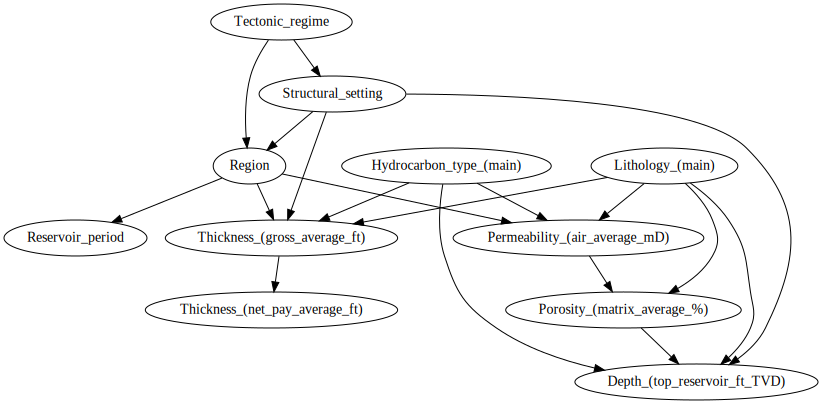

In [45]:
draw_bn(model_k2)

scoring_method = bdeu

In [47]:
draw_bn(model_bdeu)

SyntaxError: unexpected EOF while parsing (<ipython-input-47-3ac6a3a316a9>, line 1)

k2 + various bins

In [ ]:
draw_bn(model_k2_varbins)

bdeu + various bins

In [ ]:
draw_bn(model_bdeu_varbins)

### Sampling

In [ ]:
from pgmpy.models import BayesianModel

In [ ]:
def get_model(model, data):
    bm = BayesianModel(model.edges())
    bm.fit(data)
    return bm

In [ ]:
def get_samples(model, data, size):
    bm = BayesianModel(model.edges())
    bm.fit(data)
    samples = BayesianModelSampling(bm).forward_sample(size=size)
    return samples

In [ ]:
df_final.head()

In [ ]:
%%time
size = 442
k2_samples = get_samples(model_k2, df_final, size)
bdeu_samples = get_samples(model_bdeu, df_final, size)
k2_samples_varbins = get_samples(model_k2_varbins, df_final_varbins, size)
bdeu_samples_varbins = get_samples(model_bdeu_varbins, df_final_varbins, size)

### Histograms comparison

In [ ]:
def compare(param, source, bdeu_samples, k2_samples, ax):
    final = pd.DataFrame()
    df1 = pd.DataFrame()
    df1[param] = source[param]
    df1['data'] = 'source'
    df1['prob'] = df1[param].apply(lambda x: (df1.groupby(param)[param].count()[x]) / source.shape[0])
    df2 = pd.DataFrame()
    df2[param] = bdeu_samples[param]
    df2['data'] = 'bdeu'
    df2['prob'] = df2[param].apply(lambda x: (df2.groupby(param)[param].count()[x]) / bdeu_samples.shape[0])
    df3 = pd.DataFrame()
    df3[param] = k2_samples[param]
    df3['data'] = 'k2'
    df3['prob'] = df3[param].apply(lambda x: (df3.groupby(param)[param].count()[x]) / k2_samples.shape[0])
    final = pd.concat([df1, df2, df3])
    sns.barplot(x=param, y='prob', hue='data', data=final, ax=ax)

In [ ]:
def compare_all(param, source, bdeu_samples, k2_samples, bdeu_samples_varbins, k2_samples_varbins, ax):
    final = pd.DataFrame()
    df1 = pd.DataFrame()
    df1[param] = source[param]
    df1['data'] = 'source'
    df1['prob'] = df1[param].apply(lambda x: (df1.groupby(param)[param].count()[x]) / source.shape[0])
    df2 = pd.DataFrame()
    df2[param] = bdeu_samples[param]
    df2['data'] = 'bdeu'
    df2['prob'] = df2[param].apply(lambda x: (df2.groupby(param)[param].count()[x]) / bdeu_samples.shape[0])
    df3 = pd.DataFrame()
    df3[param] = k2_samples[param]
    df3['data'] = 'k2'
    df3['prob'] = df3[param].apply(lambda x: (df3.groupby(param)[param].count()[x]) / k2_samples.shape[0])
    df4 = pd.DataFrame()
    df4[param] = k2_samples_varbins[param]
    df4['data'] = 'k2_varbins'
    df4['prob'] = df4[param].apply(lambda x: (df4.groupby(param)[param].count()[x]) / k2_samples_varbins.shape[0])
    df5 = pd.DataFrame()
    df5[param] = bdeu_samples_varbins[param]
    df5['data'] = 'bdeu_varbins'
    df5['prob'] = df5[param].apply(lambda x: (df5.groupby(param)[param].count()[x]) / bdeu_samples_varbins.shape[0])
    final = pd.concat([df1, df2, df3, df4, df5])
    sns.barplot(x=param, y='prob', hue='data', data=final, ax=ax)

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(25, 15))
for i, c in enumerate(df_final.columns):
    compare_all(c, df_final, bdeu_samples, k2_samples, bdeu_samples_varbins, k2_samples_varbins, axes[i // 4, i % 4])

### SRMSE

In [ ]:
import itertools
import math

In [ ]:
def SRMSE(synth_data, test_data, attributes):
    summa = 0
    values = []
    M = 1
    for atr in attributes:
        if len(np.unique(synth_data[:,atr])) > len(np.unique(test_data[:,atr])):
            values.append(np.unique(synth_data[:,atr]))
            M *= len(np.unique(synth_data[:,atr]))
        else:
            values.append(np.unique(test_data[:,atr]))
            M *= len(np.unique(test_data[:,atr]))
    combinations = []
    for xs in itertools.product(*values):
        combinations.append(list(xs))
    
    synth_data = synth_data[:, attributes]
    test_data = test_data[:, attributes]
    for comb in combinations:
        f1_ = (synth_data == comb).all(axis=1).sum() 
        f1 = (test_data == comb).all(axis=1).sum()
        summa += (((f1 - f1_)**2) / M)
    srmse = math.sqrt(summa)
    return (srmse)

for num_cols = ['Depth_(top_reservoir_ft_TVD)', 'Thickness_(gross_average_ft)', 'Thickness_(net_pay_average_ft)', 'Porosity_(matrix_average_%)', 'Permeability_(air_average_mD)']

In [ ]:
SRMSE(k2_samples.values, df_final.values, [2, 3, 6, 9, 10])

for cat_cols = ['Tectonic_regime', 'Region', 'Hydrocarbon_type_(main)', 'Structural_setting', 'Reservoir_period', 'Lithology_(main)']

In [ ]:
SRMSE(k2_samples.values, df_final.values, [0, 1, 4, 5, 7, 8])

for cols with quite high correlation ['Porosity_(matrix_average_%)', 'Permeability_(air_average_mD)']

In [ ]:
SRMSE(k2_samples.values, df_final.values, [9, 10])

### find optimal alpha via exhaustive search and srmse

In [ ]:
if 0:
    # took almost 2 hours
    srmse_num = []
    srmse_cat = []
    srmse_corr = []
    sample_size_values = list(range(20, 101))

    for sample_size in range(20, 101):
        temp = []
        bdeu = BDeuScore(df_final, equivalent_sample_size=sample_size)
        est = HillClimbSearch(data=df_final, scoring_method=bdeu)
        model_bdeu = est.estimate()
        bdeu_bm = BayesianModel(model_bdeu.edges())
        bdeu_bm.fit(df_final)
        bdeu_samples = BayesianModelSampling(bdeu_bm).forward_sample(size=442)
        srmse_num.append(SRMSE(bdeu_samples.values, df_final.values, [2, 3, 6, 9, 10]))
        srmse_cat.append(SRMSE(bdeu_samples.values, df_final.values, [0, 1, 4, 5, 7, 8]))
        srmse_corr.append(SRMSE(bdeu_samples.values, df_final.values, [9, 10]))
        
    result_df = pd.DataFrame(data={'sample_size': sample_size_values, 'num_srmse': srmse_num, 'cat_srmse': srmse_cat, 'corr_srmse': srmse_corr})
    result_df['mean_srmse'] = result_df[['num_srmse','cat_srmse','corr_srmse']].mean(axis=1)
    result_df.to_csv('bdeu_model_selection')
    result_df.sort_values('cat_srmse').head()

In [ ]:
if 0:
    #bdeu = BDeuScore(df_final, equivalent_sample_size=27)
    #est = HillClimbSearch(data=df_final, scoring_method=bdeu)
    #model_bdeu = est.estimate()
    #bdeu_bm = BayesianModel(model_bdeu.edges())
    #bdeu_bm.fit(df_final)
    bdeu_samples = BayesianModelSampling(bdeu_bm).forward_sample(size=442)

In [ ]:
if 0:
    fig, axes = plt.subplots(3, 4, figsize=(25, 15))
    for i, c in enumerate(df_final.columns):
        compare(c, df_final, bdeu_samples, k2_samples, axes[i // 4, i % 4])

### Invert discretization and label encoding

In [ ]:
cat_cols_to_invert = ['Tectonic_regime', 'Region', 'Hydrocarbon_type_(main)', 'Structural_setting', 'Reservoir_period', 'Lithology_(main)']

In [ ]:
def invert_transformations(samples):
    result = samples.copy()
    result[num_cols.columns] = kbins.inverse_transform(samples[num_cols.columns])
    result[cat_cols_to_invert] = result[cat_cols_to_invert].apply(lambda x: d[x.name].inverse_transform(x))
    return result

In [ ]:
k2_inverted = invert_transformations(k2_samples)
k2_inverted = k2_inverted.drop_duplicates()
k2_inverted = k2_inverted.dropna()
k2_inverted.shape

In [ ]:
bdeu_inverted = invert_transformations(bdeu_samples)
bdeu_inverted = bdeu_inverted.drop_duplicates()
bdeu_inverted = bdeu_inverted.dropna()
bdeu_inverted.shape

In [ ]:
invert_transformations(k2_samples).head(10)

The next step will be applying anomaly the detection model to this sythetic data

In [ ]:
invert_transformations(bdeu_samples).to_csv('bdeu_samples_2.csv')
invert_transformations(k2_samples).to_csv('k2_samples_2.csv')

### Inference

In [ ]:
from pgmpy.inference import VariableElimination

In [ ]:
infer = VariableElimination(get_model(model_k2, df_final))

In [ ]:
to_infer = data[data.isnull().any(axis=1)]
to_infer = to_infer[need_cols]
to_infer = to_infer.drop(['Tectonic_regime', 'Porosity_(matrix_average_%)'], axis=1)

In [ ]:
to_infer['Porosity_(matrix_average_%)'] = 0

In [ ]:
infer_num_cols = ['Depth_(top_reservoir_ft_TVD)', 'Thickness_(gross_average_ft)', 'Thickness_(net_pay_average_ft)', 'Porosity_(matrix_average_%)', 'Permeability_(air_average_mD)']
to_infer[infer_num_cols] = kbins.transform(to_infer[infer_num_cols])
to_infer.head()

In [ ]:
cat_cols_to_infer = [ 'Region', 'Hydrocarbon_type_(main)', 'Structural_setting', 'Reservoir_period', 'Lithology_(main)']

In [ ]:
to_infer[cat_cols_to_infer] = to_infer[cat_cols_to_infer].apply(lambda x: d[x.name].transform(x))
to_infer.head()

In [ ]:
result_df = data[data.isnull().any(axis=1)]
result_df.shape

In [ ]:
values = []
for i, r in to_infer.iterrows():
    evidence = {}
    for c in to_infer.columns:
        if c != 'Tectonic_regime' and c != 'Porosity_(matrix_average_%)':
            evidence[c] = r[c]
    q = infer.map_query(variables=['Tectonic_regime', 'Porosity_(matrix_average_%)'], evidence=evidence)
    values.append(q)

In [ ]:
len(result_df)

In [ ]:
result_df['Tectonic_regime'] = d['Tectonic_regime'].inverse_transform(result_df['Tectonic_regime'])

In [ ]:
result_df['Tectonic_regime'] = result_df['Tectonic_regime'].astype('int')

In [ ]:
result_df[['Depth_(top_reservoir_ft_TVD)', 'Thickness_(gross_average_ft)', 'Thickness_(net_pay_average_ft)', 'Permeability_(air_average_mD)']] = 1

In [ ]:
ind = 0
for i, r in result_df.iterrows():
    result_df.loc[i, 'Tectonic_regime'] = values[ind]['Tectonic_regime']
    result_df.loc[i, 'Porosity_(matrix_average_%)'] = values[ind]['Porosity_(matrix_average_%)']
    ind += 1

In [ ]:
result_df.head()

In [ ]:
result_df[['Depth_(top_reservoir_ft_TVD)', 'Thickness_(gross_average_ft)', 'Thickness_(net_pay_average_ft)', 'Porosity_(matrix_average_%)', 'Permeability_(air_average_mD)']] = kbins.inverse_transform(result_df[['Depth_(top_reservoir_ft_TVD)', 'Thickness_(gross_average_ft)', 'Thickness_(net_pay_average_ft)', 'Porosity_(matrix_average_%)', 'Permeability_(air_average_mD)']])

In [ ]:
result_df.head()

In [ ]:
result_df.to_csv('BN_results_prosity_1.csv')

### Other

if all columns were numerical we could probably use GaussianMixture

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
if 0:
    n_components = [i for i in range(10, 200, 10)]
    aics = []
    for n in n_components: 
        model = GaussianMixture(n, covariance_type='full', random_state=7)
        aics.append(model.fit(df).aic(df))

    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(n_components, aics)
    ax.grid()
    ax.set_xticks([i for i in range(10, 200, 10)])
    plt.show()